# Data visualisation

# Objectives
* Answer Business requirements 1: The client is interested in conducting a study to visually differentiate a cherry leaf that is healthy from one that contains powdery mildew.

## Inputs
* inputs/cherry_leaves-dataset/cherry-leaves/train
* inputs/cherry_leaves-dataset/cherry-leaves/test
* inputs/cherry_leaves-dataset/cherry-leaves/validation

## Outputs
* Image shape embeddings pickle file
* Mean and variability of images per label plot
* plot to distinguish contrast between mildew infected cherry leaves and uninfected cherry leaves
* Generate code that answers business requirements 1 and can be used to build a image montage with streamlits dashboard

# Set working directory and imports

In [75]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread

In [76]:
cwd = os.getcwd()

In [77]:
os.chdir('/workspace/Mildew-Detection-in-Cherry-Leaves-P5')
print("you set a new current directory")

you set a new current directory


In [78]:
work_dir = os.getcwd()
work_dir

'/workspace/Mildew-Detection-in-Cherry-Leaves-P5'

# Set input directories
* set train, validation and test paths

In [79]:
my_data_dir = '/workspace/Mildew-Detection-in-Cherry-Leaves-P5/inputs/cherry_leaves-dataset/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## set output directory

In [80]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


## Set label names

In [81]:
labels = os.listdir(train_path)
print("Label for the images are", labels)

Label for the images are ['healthy', 'powdery_mildew']


# Data visualisation of image data

## Image shape
* Compute avrage images size on train set

/tmp/ipykernel_836/3390698654.py:14: RuntimeWarning: Mean of empty slice.
  dim1_mean = int(np.array(dim1).mean())
/workspace/.pip-modules/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: cannot convert float NaN to integer

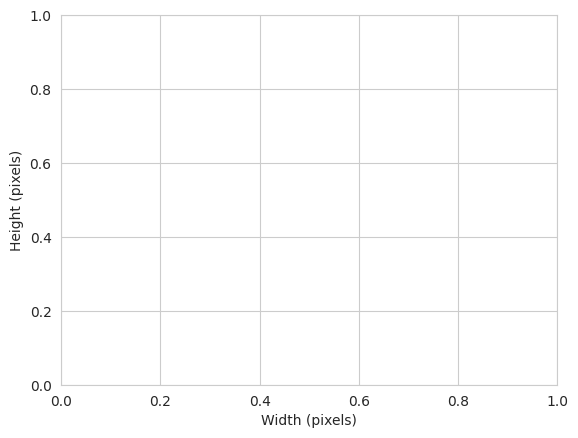

In [86]:
dim1, dim2 = [], []
for label in labels:
  for image_filename in os.listdir(train_path + '/'+ label):
    img = imread(train_path + '/' + label + '/'+ image_filename)
    d1, d2, colors = img.shape
    dim1.append(d1) # image height
    dim2.append(d2) # image width

sns.set_style("whitegrid")
fig, axes = plt.subplots()
sns.scatterplot(x=dim2, y=dim1, alpha=0.2)
axes.set_xlabel("Width (pixels)")
axes.set_ylabel("Height (pixels)")
dim1_mean = int(np.array(dim1).mean())
dim2_mean = int(np.array(dim2).mean())
axes.axvline(x=dim1_mean,color='r', linestyle='--')
axes.axhline(y=dim2_mean,color='r', linestyle='--')
plt.show()
print(f"Width average: {dim2_mean} \nHeight average: {dim1_mean}")